In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"C:\Users\babuk\Downloads\unified mentor coffee sales\coffee shop sales dataset.csv")

In [4]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [12]:
print( df.isnull().sum().sum())

89


## fill missing values with meadian


In [19]:
df['card']=df['card'].fillna('unknown')


In [22]:
df['card'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1133 entries, 0 to 1132
Series name: card
Non-Null Count  Dtype 
--------------  ----- 
1133 non-null   object
dtypes: object(1)
memory usage: 9.0+ KB


In [23]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [24]:
df['datetime']=pd.to_datetime(df['datetime'])

In [25]:
df['datetime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1133 entries, 0 to 1132
Series name: datetime
Non-Null Count  Dtype         
--------------  -----         
1133 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 9.0 KB


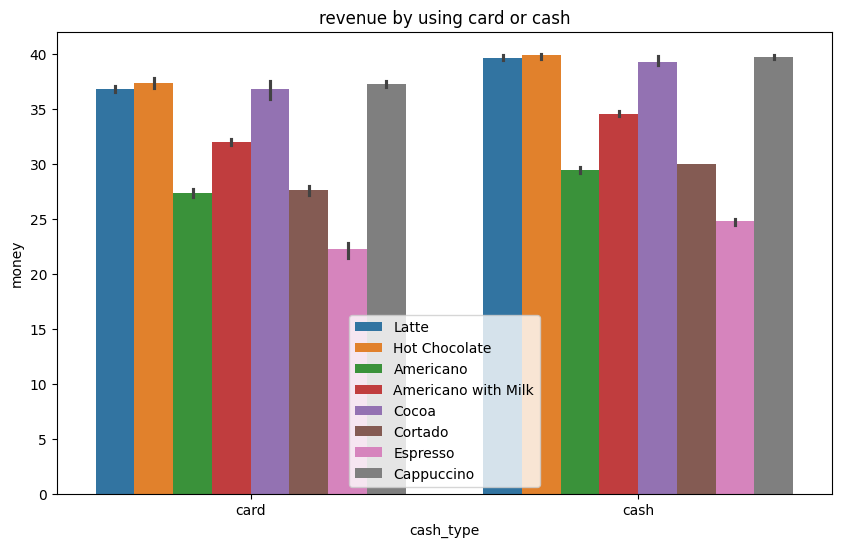

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x='cash_type',y='money',hue='coffee_name')
plt.legend()
plt.title('revenue by using card or cash')
plt.show()

## sales by money

Text(0.5, 1.0, 'coffee wise sales')

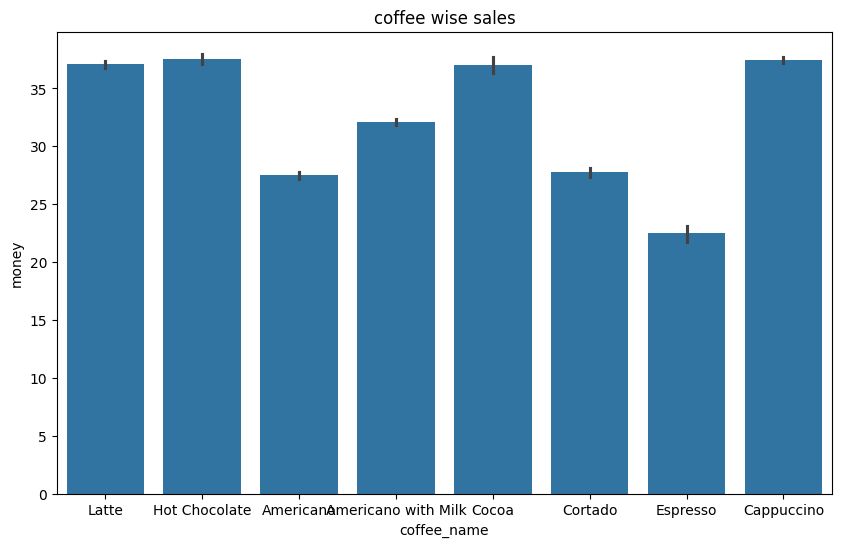

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(x='coffee_name',y='money',data=df)
plt.title("coffee wise sales")

In [39]:
df['date'].min(),df['date'].max()

('2024-03-01', '2024-07-31')

## sort by coffee sales

In [40]:
df.groupby(['coffee_name']).sum(['money']).reset_index().sort_values(by='money',ascending=False)

,coffee_name,money
7,Latte,9009.14
1,Americano with Milk,8601.94
2,Cappuccino,7333.14
0,Americano,4644.54
6,Hot Chocolate,2778.48
4,Cortado,2745.08
3,Cocoa,1295.94
5,Espresso,1100.62


<Axes: xlabel='money', ylabel='coffee_name'>

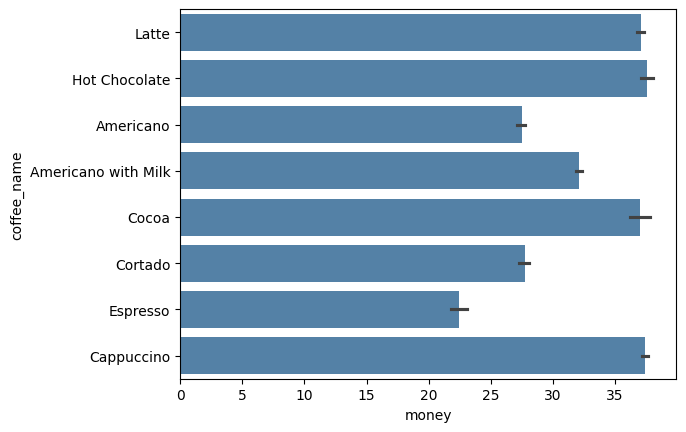

In [42]:
sns.barplot(data=df,x='money',y='coffee_name',color='steelblue')